<a href="https://colab.research.google.com/github/zhangou888/NN/blob/main/ml_model_development_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Model Development Workshop

## Welcome, Setup & Goals (10 minutes)

### Setting the Stage
Today we move from data cleaning to actually building ML models. It’s like going from prepping ingredients to actually cooking.

### What You’ll Learn:
- Bias-variance trade-off
- Avoiding overfitting with train/test split
- Feature selection and engineering
- Evaluating models
- Cross-validation and tuning
- Interpreting results
- A mini-project to practice it all!

### Ground Rules:
- Ask questions
- Work with your neighbor
- Mistakes welcome!

## The Bias-Variance Trade-Off (25 minutes)

### What You’ll Learn
- What bias and variance are
- Why too simple or too complex models fail
- How to visualize and balance both

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

In [ ]:
# Generate synthetic data
np.random.seed(0)
X = np.sort(np.random.rand(30, 1) * 2 - 1, axis=0)
y = np.sinc(X).ravel() + 0.1 * np.random.randn(30)
X
y

array([ 0.1284712 ,  0.08593889,  0.42762407,  0.13666344,  0.35433677,
        0.89425698,  1.10604457,  1.10902411,  0.99006068,  1.02808154,
        0.90808355,  0.79643587,  0.95200651,  1.00003055,  1.0928417 ,
        1.05218804,  0.83733749,  0.83548729,  0.61712822,  0.42124454,
        0.3863056 ,  0.72200095,  0.45586716,  0.37164457,  0.18825245,
        0.3331949 ,  0.00713297,  0.1006666 , -0.01185577,  0.0832297 ])

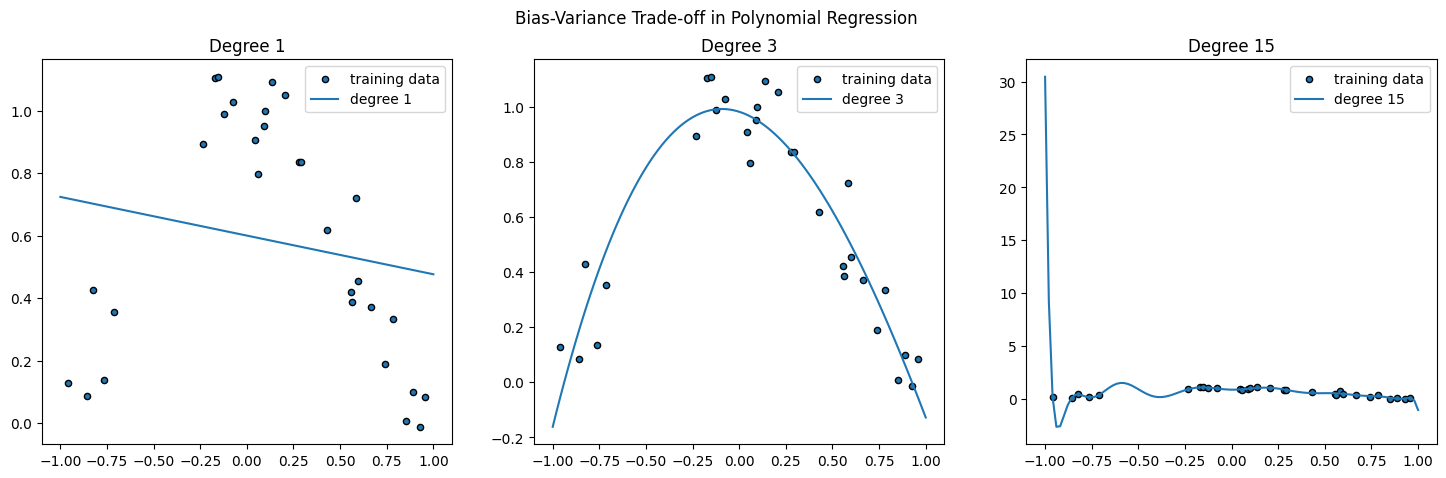

In [ ]:
# Define model degrees to illustrate underfit and overfit
degrees = [1, 3, 15]

plt.figure(figsize=(18, 5))

for i, d in enumerate(degrees):
    model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    model.fit(X, y)

    X_test = np.linspace(-1, 1, 100).reshape(-1, 1)
    y_pred = model.predict(X_test)

    plt.subplot(1, 3, i + 1)
    plt.scatter(X, y, edgecolor='black', s=20, label="training data")
    plt.plot(X_test, y_pred, label=f"degree {d}")
    plt.title(f"Degree {d}")
    plt.legend()

plt.suptitle("Bias-Variance Trade-off in Polynomial Regression")
plt.show()

## Train/Test Split & Overfitting (20 minutes)

### Why This Matters

A machine learning model can **perform perfectly on training data** and totally crash on new data. That’s called **overfitting** — and the way to guard against it is by using a **train/test split**.

- Train set: used to teach the model
- Test set: used to evaluate how well it generalizes
- A big gap between performance on the two? Red flag.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression().fit(X_train, y_train)

# Evaluate on test data
print("Training R^2:", model.score(X_train, y_train))
print("Test R^2:", model.score(X_test, y_test))

Training R^2: 0.9564328493899418
Test R^2: 0.9374151607623286


This simple example demonstrates:
- How to split your data
- How to evaluate performance on both train and test sets
- The typical drop in R² when moving from train to test — especially when overfitting

## Feature Selection & Engineering (30 minutes)

### Why Feature Selection Matters
Good features can make a mediocre model great.
Bad or irrelevant features? They’ll confuse your model and bloat your processing time.

#### Two big benefits:
- **Improves performance:** fewer distractions = better predictions
- **Boosts interpretability:** especially useful in regulated industries or when explaining results to stakeholders

### Curse of Dimensionality & Interpretability

- More features = More space to get lost
- Also makes your model harder to interpret

**“It’s like searching for a friend in a crowded football stadium vs. a 1-room cabin.”**

### Automated Feature Selection
Let’s explore **automated ways** to select only the most relevant features.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, f_classif

# Load a sample dataset
X, y = load_iris(return_X_y=True)

# Select the top 2 features based on ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X, y)

print("Original shape:", X.shape)
print("Reduced shape:", X_new.shape)

Original shape: (150, 4)
Reduced shape: (150, 2)


In [ ]:
target_names = load_iris().target_names
print(target_names)

['setosa' 'versicolor' 'virginica']


In [ ]:
feature_names = load_iris().feature_names
print(feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### Manual Feature Selection
**“Automated methods are helpful, but don’t discount your domain knowledge.”**

Encourage learners to consider:
- What features are likely *causally* related to the outcome?
- What insights did you gain from your exploratory data analysis (EDA)?
- What’s interpretable for the business?

## Model Training & Evaluation (45 minutes)

We’re going to build a few different classifiers, evaluate their performance, and dig into what the numbers really mean.

### Step 1: Load & Split Data

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Step 2: Train Models (Logistic, Random Forest, XGBoost)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# Defining and initializing machine learning models .
logreg = LogisticRegression(max_iter=200)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)
ada = AdaBoostClassifier()

model_list = [logreg, rf, xgb, ada]
for model in model_list:
    model.fit(X_train, y_train)
# # apply data into model to check the model fit
# logreg.fit(X_train, y_train)
# rf.fit(X_train, y_train)
# xgb.fit(X_train, y_train)

# obtain predicted y values from 3 models using test data.
log_preds = logreg.predict(X_test)
rf_preds = rf.predict(X_test)
xgb_preds = xgb.predict(X_test)
ada_preds = ada.predict(X_test)

### Step 3: Evaluate Models with Classification Metrics (Test data)

In [ ]:
from sklearn.metrics import classification_report

print("Logistic Regression:\n", classification_report(y_test, log_preds))
print("Random Forest:\n", classification_report(y_test, rf_preds))
print("XGBoost:\n", classification_report(y_test, xgb_preds))
print("AdaBoost:\n", classification_report(y_test, ada_preds))

Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

XGBoost:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00    

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rf_preds)
print(cm)

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


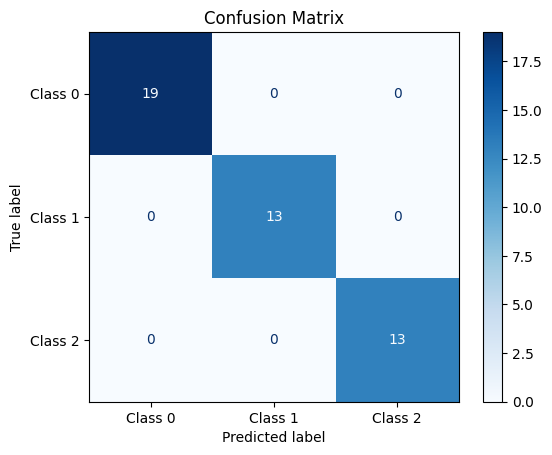

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

isp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    ada_preds,
    display_labels=['Class 0', 'Class 1', 'Class 2'], # Replace with your class name
    cmap="Blues"
    )
plt.title('Confusion Matrix')
plt.show()

### Classification Metrics Deep Dive

| Metric         | What it Measures                          | When It’s Useful                                |
|----------------|-------------------------------------------|-------------------------------------------------|
| **Accuracy**   | Overall correct predictions                | Balanced datasets                               |
| **Precision**  | Correct positive predictions               | False positives are costly (e.g., spam filter)  |
| **Recall**     | Caught actual positives                    | Missing positives is dangerous (e.g., cancer)   |
| **F1 Score**   | Balance between precision and recall       | Need both; imbalanced classes                   |
| **Confusion Matrix** | Breakdown of prediction vs actual  | Spotting specific types of errors               |

### Step 4: Bonus – Try Regression Metrics
#### Metrics and scoring: quantifying the quality of predictions

In [ ]:
# import goodness of fit metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
import numpy as np

y_true = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])

print("MAE:", mean_absolute_error(y_true, y_pred))
print("MSE:", mean_squared_error(y_true, y_pred))
print("RMSE:", root_mean_squared_error(y_true, y_pred))
print("R^2:", r2_score(y_true, y_pred))

MAE: 0.5
MSE: 0.375
RMSE: 0.6123724356957945
R^2: 0.9486081370449679


**“Different metrics answer different questions. There’s no perfect model — but with the right metrics, you’ll know what kind of ‘good’ you’re aiming for.”**

## Cross-Validation & Model Selection (30 minutes)

**Let’s say you made the world’s best guacamole… but only your mom tried it. Would you really trust that it’s amazing?**

Cross-validation helps us:

### Step 1: K-Fold Cross-Validation with scikit-learn

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load data
X, y = load_iris(return_X_y=True)
clf = RandomForestClassifier(random_state=42)

# Perform 5-fold CV
scores = cross_val_score(clf, X, y, cv=5)

print("Scores for each fold:", scores)
print("Mean accuracy:", scores.mean())

Scores for each fold: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean accuracy: 0.9666666666666668


### Group Activity: Model Comparison with Cross-Validation
### How 5-Fold Cross-Validation Works:
1. The data is divided into 5 folds.
2.
The model is trained on 4 of the folds (the "training set") and tested on the remaining fold (the "validation set")
3.
This process is repeated 5 times, each time using a different fold as the validation set.

In [ ]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', random_state=42)
}

# Evaluate each with CV
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    print(f"{name}: Mean accuracy = {scores.mean():.3f} | Fold scores = {scores}")

Logistic Regression: Mean accuracy = 0.973 | Fold scores = [0.96666667 1.         0.93333333 0.96666667 1.        ]
Random Forest: Mean accuracy = 0.967 | Fold scores = [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
XGBoost: Mean accuracy = 0.953 | Fold scores = [0.96666667 0.96666667 0.93333333 0.93333333 0.96666667]


### Step 3: Intro to GridSearchCV (Model Tuning)

Grid search helps you find the **best combination of hyperparameters** -- it's like a recipe optimizer for your model.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [None, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid.fit(X, y)

print("Best parameters:", grid.best_params_)
print("Best cross-val score:", grid.best_score_)

Best parameters: {'max_depth': None, 'n_estimators': 50}
Best cross-val score: 0.9666666666666668


## Interpreting Model Output & Pitfalls (20 minutes)

### Common Pitfalls in Model Deployment

#### 1. **Data Leakage**
> “When the model accidentally learns from the *future*.”

Example: Using `total_claim_amount` to predict `fraud`, when that feature is only filled after the fraud is discovered.

**How to prevent:**
- Check feature timing
- Consult with domain experts

#### 2. **Imbalanced Classes**
> “When one class dominates the others, and accuracy becomes meaningless.”

Example: In a fraud detection dataset where only 2% of rows are fraud, a model that always predicts "not fraud" will be 98% accurate - and totally useless.

**Why It's a Problem**
- Models tend to **defualt to the majority class**
- Metrics like accuracy **don't reflect real performance**
- Precision, recall, and F1-score become **more useful**

##### Resampling Strategies

**1. Random Undersampling**

Remove examples from the majority class

In [1]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

print("Before undersampling:", Counter(y_train))
print("After undersampling:", Counter(y_rus))

KeyboardInterrupt: 

**Pros**: Simple, fast  
**Cons**: You might lose some important data

**2. Random Oversampling**

Duplicates examples from the minority class

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Random Oversampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

print("Before oversampling:", Counter(y_train))
print("After oversampling:", Counter(y_ros))

**Pros**: Keeps all data
**Cons**: Risk of overfitting on duplicates

**3. SMOTE (Synthetic Minority Oversampling Technique)**

Creates synthetic examples of the minority class

In [ ]:
from imblearn.over_sampling import SMOTE

# SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_smote))

#### 3. **Choosing the Wrong Metric**
> “Optimizing for accuracy when you care about something else.”

Example: In healthcare, minimizing false negatives is often more important — so focus on **recall**.

### Model Interpretability

Even if your mode works well, people will (rightly ask):  
**"Why did it predict that?"**

#### Option A: SHAP (SHapley Additive Explanations)

In [ ]:
import shap

explainer = shap.Explainer(rf, X_train)
shap_values = explainer(X_test, check_additivity=False)

# Visual summary plot
shap.summary_plot(shap_values, X_test)

SHAP helps you
- Understand which features contributed to predictions
- Communicate model reasoning to stakeholders

#### Option B: Permutation Importance

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean
for i, imp in enumerate(importances):
    print(f"Feature {i}: Importance = {imp:.3f}")

This approach:
- Measures performance drop when a feature is shuffled
- Gives a rough sense of how much each feature "matters"

**“A model’s predictions are only useful if you understand *why* they’re happening — and if you know what traps to look out for.”**

## Putting It All Together: Mini-Project (30 minutes)

**It’s your turn now.** You’ve built models, evaluated them, tuned them, and interpreted their results. Now it’s time to put it all together in a real-ish problem.

### Step 1: Choose a Dataset

- Classification task (e.g., Iris, Titanic)
- Regression task (e.g., Boston Housing, synthetic)
- Or bring your own!

### Step 2: Build Your Pipeline

Steps to include:
- **Data splitting**
- **Feature selection**
- **Model choice**
- **Cross-validation**
- **Model tuning (optional)**
- **Performance evaluation**
- **Interpretation/feature importance**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris

# Load data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build pipeline
pipe = Pipeline([
    ('select', SelectKBest(score_func=f_classif, k=2)),
    ('clf', RandomForestClassifier())
])

# Grid search
param_grid = {
    'clf__n_estimators': [50, 100],
    'clf__max_depth': [None, 5]
}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

# Evaluate
preds = grid.predict(X_test)
print(classification_report(y_test, preds))

**“Whether your model nailed it or failed it, you now know the process. That’s what makes you a data scientist.”**

## Closing & Next Steps (10 minutes)

**You made it!** Four hours of serious learning, coding, questioning, experimenting — and hopefully, some fun too.

### What You’ve Accomplished

- Learned how to prep and transform data
- Explored the **bias-variance trade-off**
- Built and evaluated multiple **classification and regression models**
- Practiced **cross-validation and hyperparameter tuning**
- Interpreted model outputs and handled **imbalanced data**
- Applied it all in a **hands-on mini-project**

### Recap Key Takeaways

- Model development is **iterative** — don’t expect perfection on the first try
- Always match your metrics to your **real-world goals**
- Interpretability and trust are as important as accuracy
- Curiosity is the Data Scientists most valuable tool

**Your toolbox now includes:**
- Logistic Regression
- Random Forest
- XGBoost
- Grid Search
- SHAP / Permutation Importance
- SMOTE and resampling